# BladeX

## Tutorial 5: Prepare a blade 2D sectional profile using CustomProfile

In this tutorial we present the generation of different `CustomProfile` sections, starting both from the coordinates definition and the parameters definition.
In the first part, two different conventions for the thickness calculation are tested taken into account:
- the british convention, where the thickness is measured on the orthogonal direction w.r.t. the chord line;
- the american convention, where the thickness is measured on the orthogonal direction w.r.t. the camber line.
Moreover, a second part is considered to test the deformation of parameters.

First of all we import all the useful classes from `BladeX`, together with other utilities.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from bladex import CustomProfile, NacaProfile

### Part 1: creation of different section using either the coordinates or the parameters

We create a section with `NacaProfile`, from which we will extract the coordinates and parameters. By default, within the class the parameters are generated using the british convention. Then, we generate a `CustomProfile` section using the coordinates and another using the parameters. The parameters are also printed.

In [2]:
section = NacaProfile(digits='4412', n_points=30)

# Define CustomProfile from coordinates
section_coords = CustomProfile(xup=section.xup_coordinates,
        yup=section.yup_coordinates,
        xdown=section.xdown_coordinates,
        ydown=section.ydown_coordinates)

# Define CustomProfile from parameters
section_params = CustomProfile(chord_perc=section.chord_percentage,
        chord_len=section.chord_length,
        thickness_max=section.thickness_max,
        camber_max=section.camber_max,
        thickness_perc=section.thickness_percentage,
        camber_perc=section.camber_percentage)

print('Parameters (British convention):')
print('Chord length: {}'.format(section.chord_length))
print('Chord percentage: {}'.format(section.chord_percentage))
print('Thickness max: {}'.format(section.thickness_max))
print('Thickness percentage: {}'.format(section.thickness_percentage))
print('Camber max: {}'.format(section.camber_max))
print('Camber percentage: {}'.format(section.camber_percentage))

Parameters (British convention):
Chord length: 1.0
Chord percentage: [0.         0.02904817 0.06233258 0.09649612 0.13115634 0.16614077
 0.20134615 0.23670127 0.2721528  0.30765872 0.34318492 0.37870306
 0.4139692  0.44887493 0.48375021 0.51858868 0.55338477 0.58813361
 0.6228308  0.65747236 0.69205453 0.72657375 0.76102644 0.79540903
 0.82971775 0.86394861 0.89809728 0.932159   0.96612852 1.        ]
Thickness max: 0.11984156347903108
Thickness percentage: [0.00000000e+00 4.96261940e-01 6.68783145e-01 7.82477388e-01
 8.62832486e-01 9.19991221e-01 9.59371400e-01 9.84365536e-01
 9.97325460e-01 1.00000000e+00 9.93756161e-01 9.79701518e-01
 9.58774960e-01 9.31918157e-01 8.99816460e-01 8.63013268e-01
 8.21967086e-01 7.77062351e-01 7.28617424e-01 6.76890613e-01
 6.22084813e-01 5.64351132e-01 5.03791784e-01 4.40462439e-01
 3.74374155e-01 3.05495009e-01 2.33751484e-01 1.59029678e-01
 8.11763745e-02 2.75484733e-16]
Camber max: 0.03997886114414057
Camber percentage: [0.         0.1650694  0.315

Then the same thing is done using the american convention. When printing the parameters, there is a little difference in the thickness between the two conventions, as we expected.

In [3]:
section.generate_parameters(convention='american')

# Define CustomProfile from parameters (american convention)
section_american_coords = CustomProfile(chord_perc=section.chord_percentage,
        chord_len=section.chord_length,
        thickness_max=section.thickness_max,
        camber_max=section.camber_max,
        thickness_perc=section.thickness_percentage,
        camber_perc=section.camber_percentage)

# Define CustomProfile from coordinates calculated from the previously generated parameters (american convention)
section_american_coords.generate_coordinates(convention='american')
section_american_params = CustomProfile(xup=section_american_coords.xup_coordinates,
        yup=section_american_coords.yup_coordinates,
        xdown=section_american_coords.xdown_coordinates,
        ydown=section_american_coords.ydown_coordinates)

print('Parameters (American convention):')
print('Chord length: {}'.format(section.chord_length))
print('Chord percentage: {}'.format(section.chord_percentage))
print('Thickness max: {}'.format(section.thickness_max))
print('Thickness percentage: {}'.format(section.thickness_percentage))
print('Camber max: {}'.format(section.camber_max))
print('Camber percentage: {}'.format(section.camber_percentage))

Parameters (American convention):
Chord length: 1.0
Chord percentage: [0.         0.02904817 0.06233258 0.09649612 0.13115634 0.16614077
 0.20134615 0.23670127 0.2721528  0.30765872 0.34318492 0.37870306
 0.4139692  0.44887493 0.48375021 0.51858868 0.55338477 0.58813361
 0.6228308  0.65747236 0.69205453 0.72657375 0.76102644 0.79540903
 0.82971775 0.86394861 0.89809728 0.932159   0.96612852 1.        ]
Thickness max: 0.12022845170420489
Thickness percentage: [4.03999691e-16 4.73341009e-01 6.73939922e-01 7.86959769e-01
 8.69699145e-01 9.26697643e-01 9.64968132e-01 9.88237455e-01
 9.99238891e-01 1.00000000e+00 9.92102816e-01 9.76807599e-01
 9.55369251e-01 9.28381990e-01 8.96168256e-01 8.59352548e-01
 8.18397327e-01 7.73685641e-01 7.25527556e-01 6.74167564e-01
 6.19790048e-01 5.62523793e-01 5.02445715e-01 4.39583990e-01
 3.73920703e-01 3.05394298e-01 2.33900792e-01 1.59299766e-01
 8.13976137e-02 6.34856657e-16]
Camber max: 0.03997886114414057
Camber percentage: [0.         0.1650694  0.31

Then, the four sections are visualized in a plot: the results obtained are exactly the same using all the different initializations.

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 1

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ume P Mincho S3' (ume-pms3.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Keter YG' (KeterYG-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstOffice' (KacstOffice.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'rsfs10' (rsfs10.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstFarsi' (KacstFarsi.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Unikurd Web' (Unikuweb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ume Gothic S4' (ume-tgs4.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao UI' (NotoSansLaoUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstPoster' (KacstPoster.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Khmer OS Fasthand' (KhmerOS_fasthand.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ume P Gothic' (ume-pgo4.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnar

DEBUG:matplotlib.font_manager:findfont: score(<Font 'NanumMyeongjo' (NanumMyeongjo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'esint10' (esint10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotli

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Keter YG' (KeterYG-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ume P Gothic S4' (ume-pgs4.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal 800 normal>) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findf

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Purisa' (Purisa-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Devanagari UI' (NotoSansDevanagariUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'stmary10' (stmary10.ttf) normal normal 400 normal>) = 10.05
DEBU

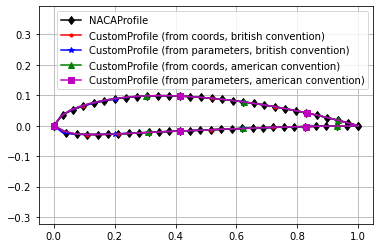

In [4]:
plt.figure()
plt.plot(section.xup_coordinates, section.yup_coordinates, 'k', marker='d', label='NACAProfile')
plt.plot(section.xdown_coordinates, section.ydown_coordinates, 'k', marker='d')
plt.plot(section_coords.xup_coordinates, section_coords.yup_coordinates, 'r', marker='.', markevery=3,
         label='CustomProfile (from coords, british convention)')
plt.plot(section_coords.xdown_coordinates, section_coords.ydown_coordinates, 'r', marker='.', markevery=3)
plt.plot(section_params.xup_coordinates, section_params.yup_coordinates, 'b', marker='*', markevery=6,
         label='CustomProfile (from parameters, british convention)')
plt.plot(section_params.xdown_coordinates, section_params.ydown_coordinates, 'b', marker='*', markevery=6)
plt.plot(section_american_coords.xup_coordinates, section_american_coords.yup_coordinates, 'g', marker='^', markevery=9,
         label='CustomProfile (from coords, american convention)')
plt.plot(section_american_coords.xdown_coordinates, section_american_coords.ydown_coordinates, 'g', marker='^', markevery=9)
plt.plot(section_american_params.xup_coordinates, section_american_params.yup_coordinates, 'm', marker='s', markevery=12,
         label='CustomProfile (from parameters, american convention)')
plt.plot(section_american_params.xdown_coordinates, section_american_params.ydown_coordinates, 'm', marker='s', markevery=12)
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

### Part 2: deformation of the section by modifying the parameters

Here, the deformation rates of the thickness and camber are defined and then a new `CustomProfile` section is generated considering as parameters the previous ones multiplied by the deformation rates.

In [5]:
thickness_max_rate = 2
camber_max_rate = 0.5

section_deformed = CustomProfile(chord_perc=section.chord_percentage,
        chord_len=section.chord_length,
        thickness_max=section.thickness_max*thickness_max_rate,
        camber_max=section.camber_max*camber_max_rate,
        thickness_perc=section.thickness_percentage,
        camber_perc=section.camber_percentage)

Finally, the original section and the deformed one are plotted to see how the deformation acts.

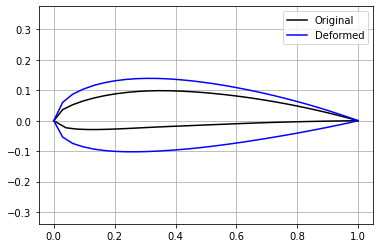

In [6]:
plt.figure()
plt.plot(section.xup_coordinates, section.yup_coordinates, 'k', label='Original')
plt.plot(section.xdown_coordinates, section.ydown_coordinates, 'k')
plt.plot(section_deformed.xup_coordinates, section_deformed.yup_coordinates, 'b', label='Deformed')
plt.plot(section_deformed.xdown_coordinates, section_deformed.ydown_coordinates, 'b')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()